<a href="https://colab.research.google.com/github/SJinLee/PPG/blob/main/04.Yurim_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/SJinLee/cryptology/main/YURIM_8min.txt',header=None)

<Axes: >

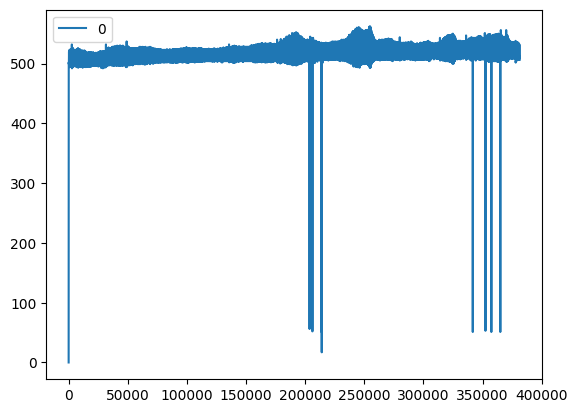

In [4]:
data.plot()

In [9]:
def get_lowpass(ppg):
    ppg2 = ppg.copy()
    d = 0.7
    a = d
    b = 1-d
    xi = ppg2['Red_Signal'].values[1:].astype(float).copy()
    v = ppg2['Red_Signal'].values.astype(float).copy()
    y = v[0]
    i = 1
    for x in xi:
        y += b*(x-y)
        v[i] = y
        i += 1
    ppg2['Red_Signal2'] = v
    ppg2['Time'] = pd.to_datetime(ppg2['Time'])
    return ppg2

In [11]:
data2 = data.rename(columns={0:'Red_Signal'})
data3 = get_lowpass(data2)


KeyError: 'Time'

<Axes: >

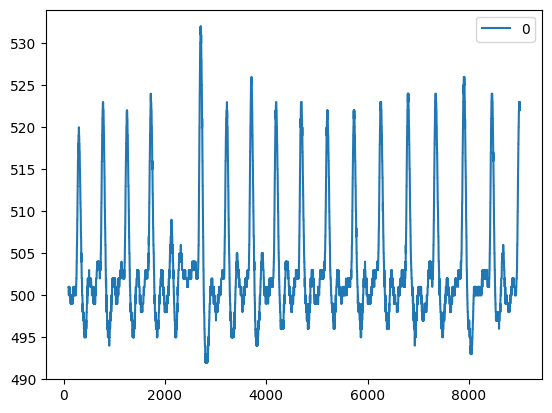

In [6]:
data.iloc[100:9000].plot()

In [8]:
diffdata = data.diff()
diffdata.loc[diffdata[0]!=0]

,0
0,NaN
1,500.0
7,1.0
16,1.0
17,-1.0
...,...
381194,-1.0
381196,1.0
381197,-1.0
381198,1.0
